<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Data Normalization
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>What is Data Normalization?</strong>
<br>
• Data normalization is a statistical technique used to adjust the values in a dataset to a common scale.
<br>
• Normalization helps ensure that no single feature dominates the analysis or model training.
<br>
• Many machine learning algorithms especially those that rely on distance calculations (like k-NN, k-Means or SVM) perform better when the data is normalized.
</div>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV File
df = pd.read_csv("wine.csv", usecols=[1,2,3])
df.sample(5)

,ClassLabel,Alcohal,MalicAcid
20,1,12.93,3.80
81,2,12.08,1.13
6,1,14.06,2.15
18,1,13.64,3.10
15,1,14.30,1.92


In [3]:
# Shape of the DataFrame
df.shape

(177, 3)

In [4]:
# Description of the DataFrame
df.describe()

,ClassLabel,Alcohal,MalicAcid
count,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887
std,0.773991,0.808808,1.119314
min,1.000000,11.030000,0.740000
25%,1.000000,12.360000,1.600000
50%,2.000000,13.050000,1.870000
75%,3.000000,13.670000,3.100000
max,3.000000,14.830000,5.800000


In [5]:
# Different ClassLabels in the Data
df["ClassLabel"].unique()

array([1, 2, 3])

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Train Test Split</strong>
<br>
The train-test split is a common technique in machine learning for evaluating model performance. It involves dividing your dataset into two parts :
<br>
• <strong>Training Set :</strong> Used to train the model.
<br>
• <strong>Testing Set :</strong> Used to evaluate the model's performance on unseen data.
<br>
<br>
<strong>Parameters</strong>
<br>
• <strong>arrays :</strong> This can be a list or a tuple of arrays (e.g, features and target variables).
<br>
• <strong>test_size :</strong> Determines the proportion of the dataset to include in the test split (e.g, 0.2 for 20%).
<br>
• <strong>random_state :</strong> Controls the shuffling applied to the data before the split (e.g., any integer).
<br>
• <strong>shuffle :</strong> A boolean that indicates whether to shuffle the data before splitting.
</div>

In [6]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [7]:
# Dividing Features and Target Vaiables
X = df[["Alcohal","MalicAcid"]]
y = df["ClassLabel"]

In [8]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [9]:
# Shape of Traning and Testing Set
print(X_train.shape, X_test.shape)

(123, 2) (54, 2)


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>MinMaxScaler</strong>
<br>
• The MinMaxScaler is a normalization technique that transforms features to a specified range typically [0, 1]. 
<br>
• It rescales the data by adjusting the minimum and maximum values of the dataset.
<br>
<br>
<strong>How MinMaxScaler Works</strong>
<br>
<strong>Identify Minimum and Maximum</strong>
<br>
• For each feature determine the minimum and maximum values.
<br>
<strong>Apply the Transformation</strong>
<br>
• Use the MinMaxScaler formula to transform each value in the feature.
<br>
• The formula for Min-Max Scaling is :
$$X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$
where:
<br>
• $X$ is the original value
<br>
• $X_{\text{min}}$ is the minimum value of the feature
<br>
• $X_{\text{max}}$ is the maximum value of the feature
<br>
• $X'$ is the scaled value
<br>
<br>
<strong>Benefits of Using MinMaxScaler</strong>
<br>
<strong>Bounded Values</strong>
<br>
• The transformed values are bounded within a specific range which can be helpful for algorithms that require bounded inputs.
<br>
<strong>Preservation of Relationships</strong>
<br>
• MinMaxScaler preserves the relationships among the original data points.
<br>
<strong>Simple to Understand</strong>
<br>
• The concept is straightforward and easy to implement.
</div>

In [10]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Creating MinMaxScaler Object
m = MinMaxScaler()

In [12]:
# Fitting and Transforming Data
X_train_scaled = m.fit_transform(X_train)
X_test_scaled = m.transform(X_test)

In [13]:
# After calling the transform method (or fit_transform method) on the Data
# It returns a NumPy array, So we have to convert it into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
# Description of the DataFrame after Normalization
np.round(X_train_scaled.describe(), 2)

,Alcohal,MalicAcid
count,123.00,123.00
mean,0.54,0.33
std,0.22,0.23
min,0.00,0.00
25%,0.35,0.17
50%,0.55,0.22
75%,0.71,0.50
max,1.00,1.00


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Understanding Feature Scaling and Relationships</strong>
<br>
• The MinMaxScaler transforms your features by scaling them to a specified range usually [0, 1]. 
<br>
• While it changes the scale of your data, it doesn't alter the underlying distribution shape. 
<br>
• If your original data was for instance, normally distributed after scaling it will still resemble a normal distribution but just be stretched or compressed into the [0, 1] range.
<br>
<br>
<strong>Preservation of Shape :</strong> The scaling process preserves the relative distances and order of the data points. Thus, if you plot the distributions of the original and scaled data they will look similar in shape.
<br>
<strong>Range Change :</strong> The key difference is that the original data is within its own range (which could be any values) while the scaled data is confined to the [0, 1] range.
<br>
<strong>Outliers :</strong> If there are outliers in your data, they can still influence the shape of the scaled data distribution. They might appear more compressed in the scaled version since they get squeezed into the [0, 1] range.
</div>

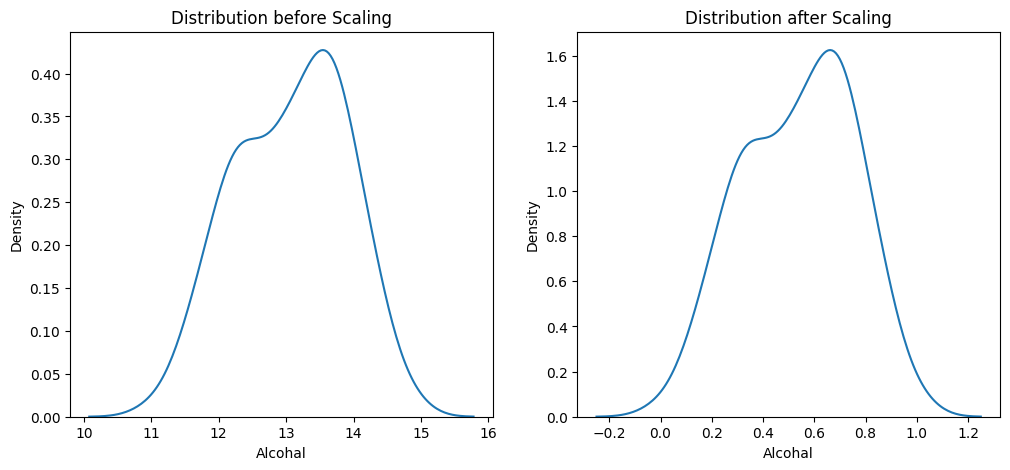

In [15]:
# Univariate Analysis before and after Scaling
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=X_train["Alcohal"], ax=ax[0])
ax[0].set_title("Distribution before Scaling")
sns.kdeplot(x=X_train_scaled["Alcohal"], ax=ax[1])
ax[1].set_title("Distribution after Scaling")
plt.show()

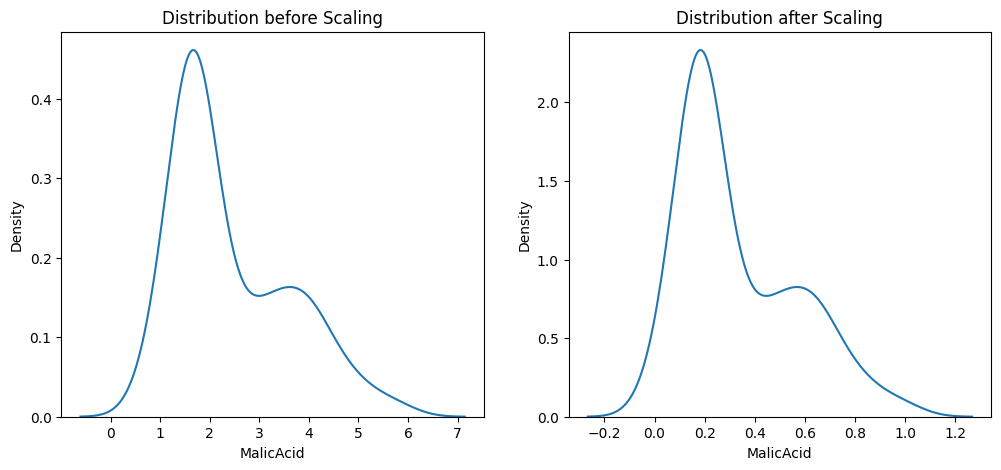

In [16]:
# Univariate Analysis before and after Scaling
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=X_train["MalicAcid"], ax=ax[0])
ax[0].set_title("Distribution before Scaling")
sns.kdeplot(x=X_train_scaled["MalicAcid"], ax=ax[1])
ax[1].set_title("Distribution after Scaling")
plt.show()

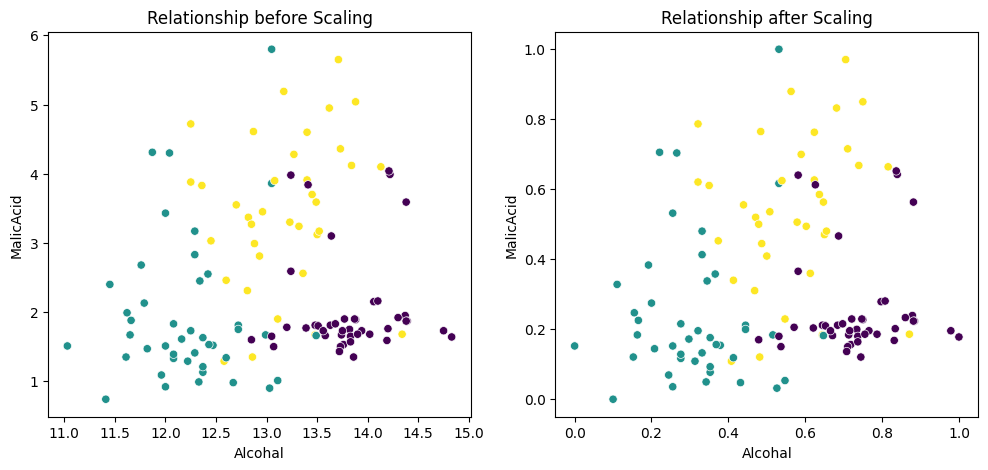

In [30]:
# Comparing Features before and after Scaling
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.scatterplot(x=X_train["Alcohal"], y=X_train["MalicAcid"], c=y_train, ax=ax[0])
ax[0].set_title("Relationship before Scaling")
sns.scatterplot(x=X_train_scaled["Alcohal"], y=X_train_scaled["MalicAcid"], c=y_train, ax=ax[1])
ax[1].set_title("Relationship after Scaling")
plt.show()

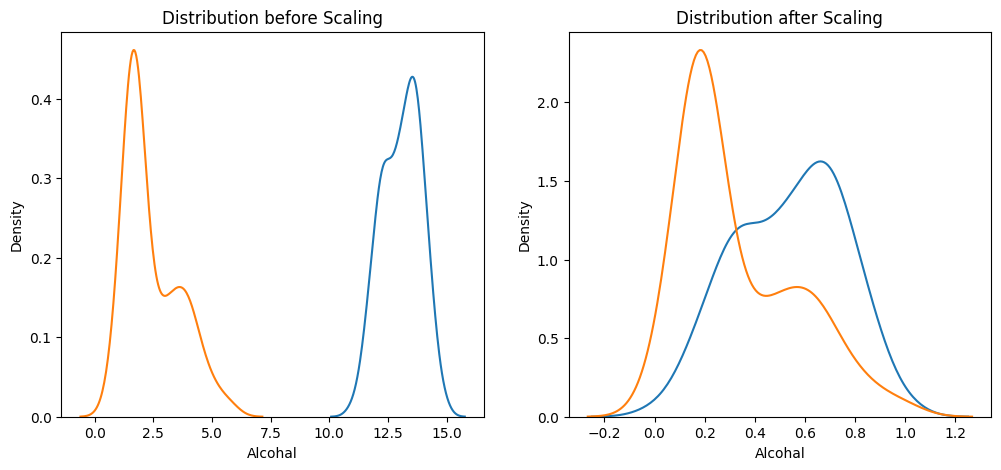

In [18]:
# Comparing Distribution before and after Scaling
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=X_train["Alcohal"], ax=ax[0])
sns.kdeplot(x=X_train["MalicAcid"], ax=ax[0])
ax[0].set_title("Distribution before Scaling")
sns.kdeplot(x=X_train_scaled["Alcohal"], ax=ax[1])
sns.kdeplot(x=X_train_scaled["MalicAcid"], ax=ax[1])
ax[1].set_title("Distribution after Scaling")
plt.show()